In [11]:
import os
from scipy import *
from scipy import signal
from pylab import *
from wave import *
import struct
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [170]:
def superprogram(p, s, x, y, a=0, b=0, c=1, v=1):
    #x and y are arrays for coordinate points
    #p is severity of effect
    #s selects effects takes integer values
    #v is a volume control input
    #h is output array
    #y is component
    
    x=np.linspace(-np.pi,30*np.pi,1000)
    y=np.zeros(1000)
    h=np.zeros(1000)
    
    #Distortion1
    #typical p values = 10
    if s== 1:
        for i in range(1000): 
            if i%2==0:
                h[i]=(.02*p)+((-a*signal.square((2*np.pi)/1000*i)) + b*signal.sawtooth((2*np.pi)/1000*i-(np.pi*i)-(np.pi*i)) + c*np.sin((2*np.pi)/1000*i))/(a+b+c)
            else:
                h[i]=-(.02*p)+((-a*signal.square((2*np.pi)/1000*i)) + b*signal.sawtooth((2*np.pi)/1000*i-(np.pi*i)-(np.pi*i)) + c*np.sin((2*np.pi)/1000*i))/(a+b+c)
        return h*v
    
    #chorus
    #typical p values = 6
    if s== 2:
        for i in range(1000): 
            y[i]=(-a*signal.square(-np.pi+(p*np.pi)/1000*i*p) + b*signal.sawtooth(-np.pi+(p*np.pi)/1000*i*p-(np.pi*i)) + c*np.sin(-np.pi+(p*np.pi)/1000*i*p))/(a+b+c) 
        #h=y+(-a*signal.square(-np.pi+(np.pi)*x) + b*signal.sawtooth(-np.pi+(np.pi)*x-(np.pi*i)) + c*np.sin(-np.pi+(p*np.pi)*x))/(a+b+c)
        h[:]=y+np.sin(-np.pi*x)
        return h*v
    
    #tremolo
    #typical p values = 10
    if s== 3:
        for i in range(1000):
            y[i]=(-a*signal.square(-np.pi+(31*np.pi)/1000*i) + b*signal.sawtooth(-np.pi+(31*np.pi)/1000*i-(np.pi*i)) + c*np.sin(-np.pi+(31*np.pi)/1000*i))/(a+b+c) 
            h[i]=(-a*signal.square(-np.pi+(31*np.pi/p)*i) + b*signal.sawtooth(-np.pi+(31*np.pi/p)*i-(np.pi*i)) + c*np.sin(-np.pi+(31*np.pi/p)*i))/(a+b+c)
        return h*y*v
    
    #fib distortion
    #typical p values = 10
    if s== 4:
        fib2=np.array([1,2,3,5,8,13,21,-1,-2,-3,-5,-8,-13,-21])
        count=0
        for i in range(1000):
            if i%2==0:
                h[i]=(.005*p*fib2[count])+((-a*signal.square((2*np.pi)/1000*i)) + b*signal.sawtooth((2*np.pi)/1000*i-(np.pi*i)-(np.pi*i)) + c*np.sin((2*np.pi)/1000*i))/(a+b+c)
                count+=1
                if count==14:
                    count=0
            else: 
                h[i]=((-a*signal.square((2*np.pi)/1000*i)) + b*signal.sawtooth((2*np.pi)/1000*i-(np.pi*i)-(np.pi*i)) + c*np.sin((2*np.pi)/1000*i))/(a+b+c)
        return h*v
    
    #if invalid selection, return only wave shapes
    else:
        for i in range(1000):
            h[i]=((-a*signal.square((2*np.pi)/1000*i)) + b*signal.sawtooth((2*np.pi)/1000*i-(np.pi*i)-(np.pi*i)) + c*np.sin((2*np.pi)/1000*i))/(a+b+c)
            
        return h*v

<IPython.core.display.Javascript object>


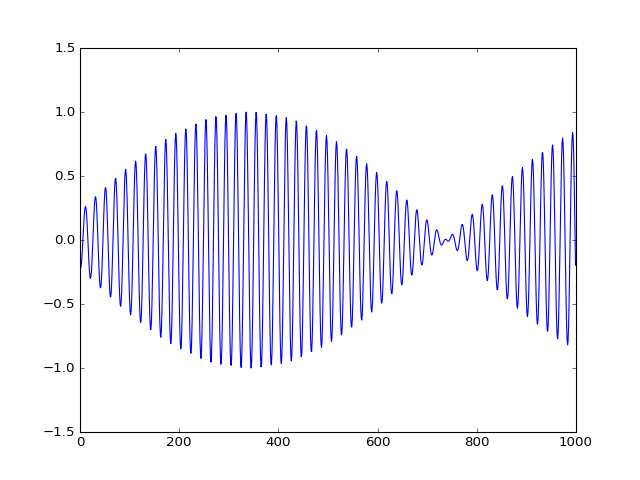

In [171]:
plt.ylim(-1.5,1.5)
plt.plot(superprogram(10, 2, x, y, 0, 0, 1, v=.5))